In [1]:
import yfinance as yf

def load_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
    
    # Print available columns
    print("Available Columns:", data.columns)

    # Extract 'Close' prices correctly
    close_prices = data.xs('Close', level='Price', axis=1)  # Fetch 'Close' across tickers

    return close_prices

# Example usage
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

data = load_data(tickers, start_date, end_date)
print("Data Loaded")
print(data.head())  # Display first rows


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

Available Columns: MultiIndex([('TSLA',   'Open'),
            ('TSLA',   'High'),
            ('TSLA',    'Low'),
            ('TSLA',  'Close'),
            ('TSLA', 'Volume'),
            ( 'BND',   'Open'),
            ( 'BND',   'High'),
            ( 'BND',    'Low'),
            ( 'BND',  'Close'),
            ( 'BND', 'Volume'),
            ( 'SPY',   'Open'),
            ( 'SPY',   'High'),
            ( 'SPY',    'Low'),
            ( 'SPY',  'Close'),
            ( 'SPY', 'Volume')],
           names=['Ticker', 'Price'])
Data Loaded
Ticker           TSLA        BND         SPY
Date                                        
2015-01-02  14.620667  62.573112  172.592865
2015-01-05  14.006000  62.754864  169.475922
2015-01-06  14.085333  62.936516  167.879578
2015-01-07  14.063333  62.974365  169.971603
2015-01-08  14.041333  62.875992  172.987778


c:\Users\Semir AI Legend\portfolio-optimization\scripts\financial_analysis.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill')
c:\Users\Semir AI Legend\portfolio-optimization\scripts\financial_analysis.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')  # Ensure no remaining NaNs


Missing Values:
 Ticker
TSLA    0
BND     0
SPY     0
dtype: int64
Summary Statistics:
 Ticker         TSLA          BND          SPY
count   2535.000000  2535.000000  2535.000000
mean     117.848209    69.289451   316.067402
std      116.508288     4.792146   117.926909
min        9.578000    61.860844   156.800888
25%       17.228000    65.565277   214.841988
50%       30.298000    68.329132   277.117950
75%      221.525002    72.879944   405.869186
max      479.859985    78.823273   609.750000


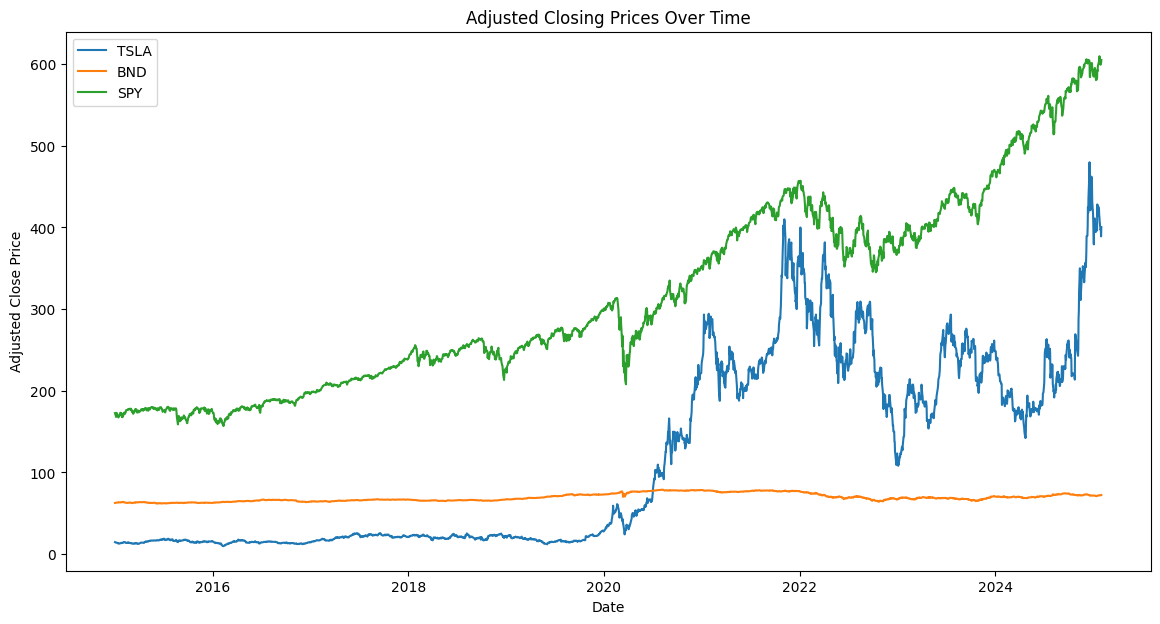

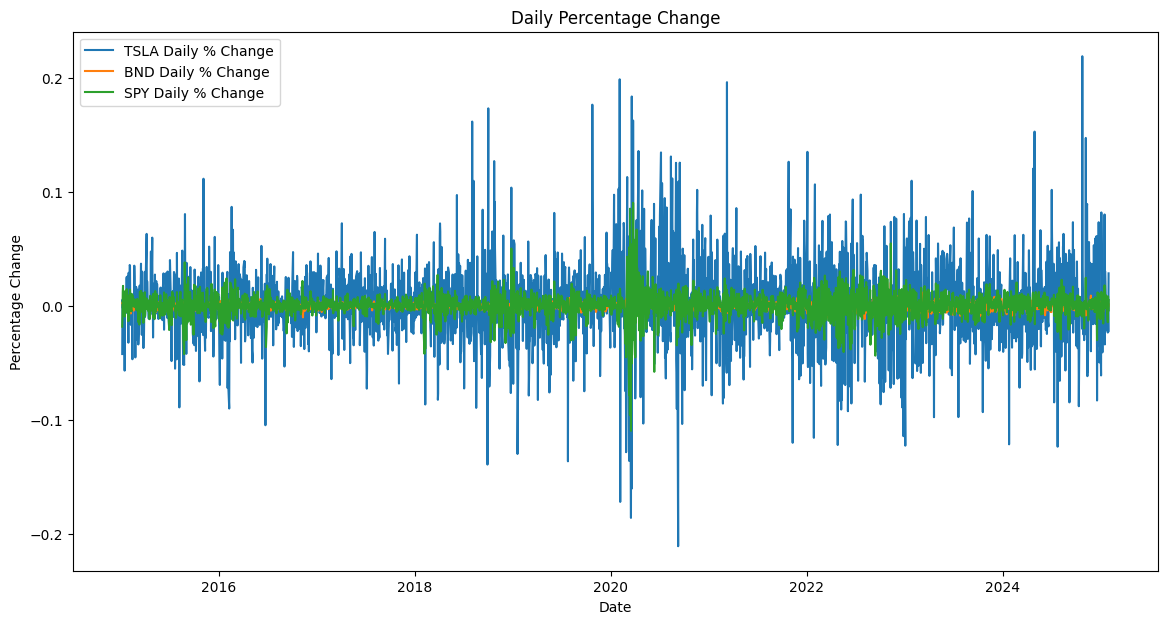

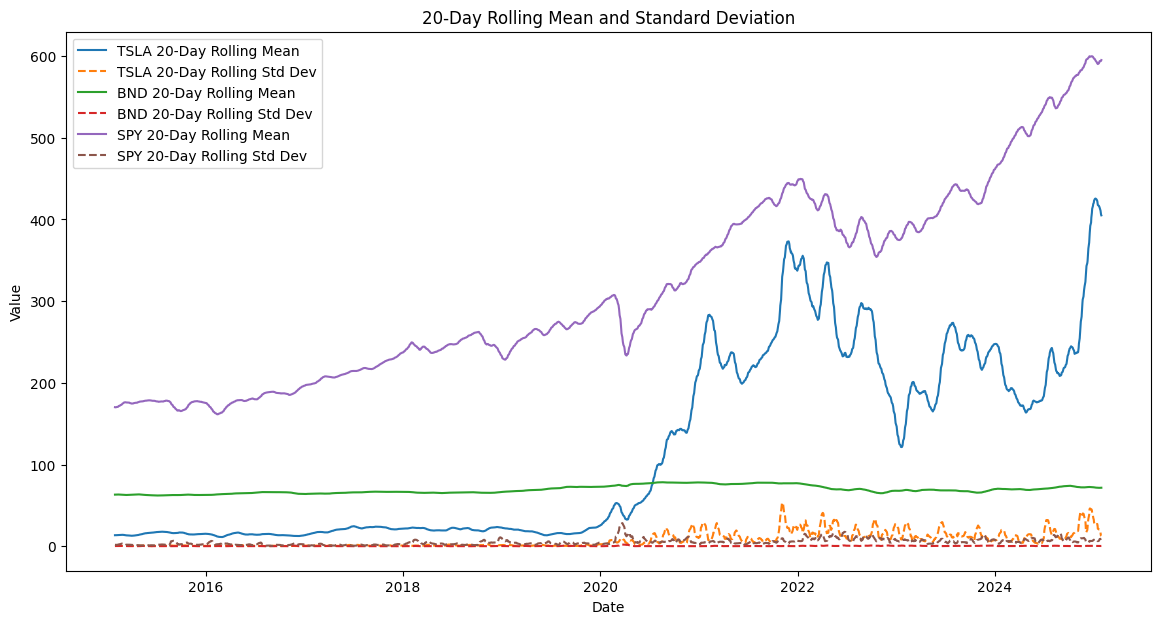

Outliers:
       TSLA  BND  SPY
0      NaN  NaN  NaN
1      NaN  NaN  NaN
2      NaN  NaN  NaN
3      NaN  NaN  NaN
4      NaN  NaN  NaN
...    ...  ...  ...
2529   NaN  NaN  NaN
2530   NaN  NaN  NaN
2531   NaN  NaN  NaN
2532   NaN  NaN  NaN
2533   NaN  NaN  NaN

[2534 rows x 3 columns]


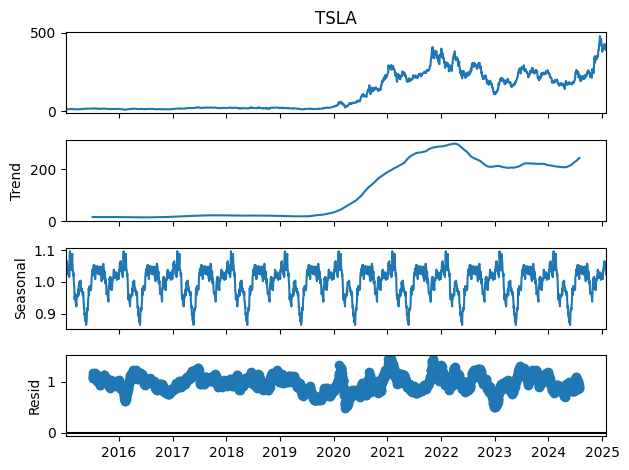

Value at Risk (5% confidence):
 Ticker
TSLA   -0.051387
BND    -0.004801
SPY    -0.016719
Name: 0.05, dtype: float64
Sharpe Ratio:
 Ticker
TSLA    0.052014
BND    -0.004955
SPY     0.043078
dtype: float64


In [2]:
# Import the module
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
from financial_analysis import *

# Step 2: Clean data and check for missing values
cleaned_data, missing_values = clean_data(data)
print("Missing Values:\n", missing_values)

# Step 3: Data Summary
summary_stats = data_summary(cleaned_data)
print("Summary Statistics:\n", summary_stats)

# Step 4: Normalize Data (for ML Models if needed)
normalized_data = normalize_data(cleaned_data)

# Step 5: Plot Closing Prices Over Time
plot_closing_prices(cleaned_data)

# Step 6: Calculate and Plot Daily Percentage Change
pct_change = plot_daily_percentage_change(cleaned_data)

# Step 7: Rolling Mean and Standard Deviation (Volatility Analysis)
plot_rolling_stats(cleaned_data, window=20)

# Step 8: Outlier Detection
outliers = detect_outliers(pct_change)
print("Outliers:\n", outliers)

# Step 9: Decompose Time Series for TSLA (example)
decomposition = decompose_time_series(cleaned_data, 'TSLA')

# Step 10: Calculate Value at Risk (VaR) and Sharpe Ratio
var_95, sharpe_ratio = calculate_risk_metrics(cleaned_data)
print("Value at Risk (5% confidence):\n", var_95)
print("Sharpe Ratio:\n", sharpe_ratio)

In [3]:
import yfinance as yf
import pandas as pd

# Step 1: Load the data
tickers = ["TSLA", "BND", "SPY"]
data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Close']

# Step 2: Data cleaning and handling missing values
# Filling missing values
data = data.interpolate(method='linear').fillna(method='bfill')

# Step 3: Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=True)  # index=True to include date as the first column

print("Data saved as cleaned_financial_data.csv")

[*********************100%***********************]  3 of 3 completed

Data saved as cleaned_financial_data.csv



C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_18016\1476778701.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear').fillna(method='bfill')


C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_18016\916654350.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = tsla_data.fillna(method='ffill')  # forward fill
C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_18016\916654350.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = tsla_data.fillna(method='bfill')  # backward fill


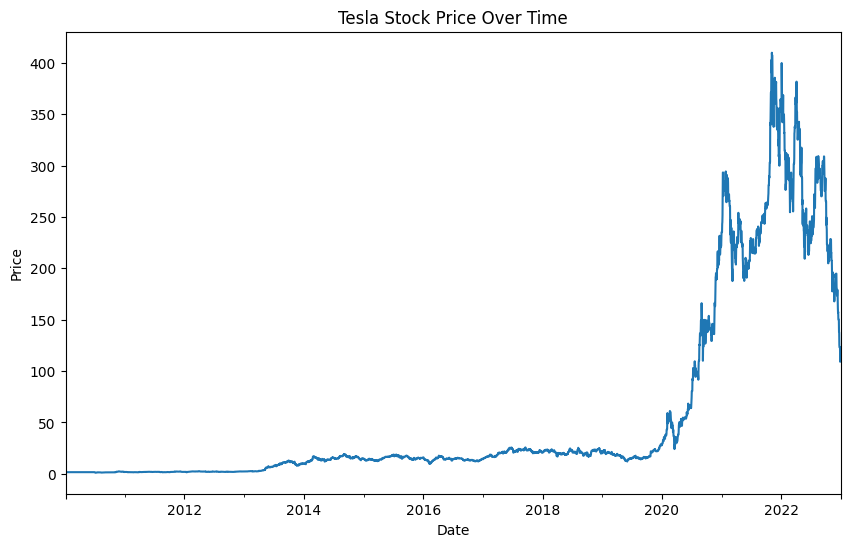

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense  

data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA']
tsla_data.index = pd.to_datetime(tsla_data.index)
tsla_data = tsla_data.asfreq('D')  # or 'M' for monthly, 'H' for hourly, etc.
# Fill NaN values
tsla_data = tsla_data.fillna(method='ffill')  # forward fill
# or
tsla_data = tsla_data.fillna(method='bfill')  # backward fill
# or
tsla_data = tsla_data.fillna(0)  # fill with zero


# Split Data
train_size = int(len(tsla_data) * 0.8)
train_data = tsla_data[:train_size].astype(float).dropna()
test_data = tsla_data[train_size:].astype(float).dropna()
tsla_data =tsla_data

# Visualization
plt.figure(figsize=(10, 6))
tsla_data.plot()
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [18]:


# Model Execution and Evaluation
try:
    mae_arima, rmse_arima, mape_arima = arima_model(train_data, test_data)
    if mae_arima:
        print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
except ValueError as e:
    print(f"Error: {e}")

mae_sarima, rmse_sarima, mape_sarima = sarima_model(train_data, test_data)
if mae_sarima is not None:
    print(f"SARIMA - MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}")
else:
    print("SARIMA model could not be fitted due to an error.")

ARIMA - MAE: 176.64235494149378, RMSE: 192.60458898211837, MAPE: 72.02434463594818
SARIMA - MAE: 166.814087402646, RMSE: 182.42113467568916, MAPE: 67.89521447721229


In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def prepare_lstm_data(data, look_back=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    
    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])
        y.append(scaled_data[i, 0])
    
    X = np.array(X).reshape((len(X), look_back, 1))
    y = np.array(y)
    
    return X, y, scaler

train_X, train_y, scaler = prepare_lstm_data(train_data, look_back=60)
test_X, test_y, _ = prepare_lstm_data(test_data, look_back=60)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def lstm_model(train_data, test_data, look_back=60, epochs=10, batch_size=32):
    # Prepare the data
    X_train, y_train, scaler = prepare_lstm_data(train_data, look_back)
    X_test, y_test, _ = prepare_lstm_data(test_data, look_back)
    
    # Build the model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Inverse scale the predictions and test data
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Calculate MAE, RMSE, and MAPE
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    
    # Return metrics and the model
    return mae, rmse, mape, model, scaler

# Call the function and unpack the results
mae_lstm, rmse_lstm, mape_lstm, model, scaler = lstm_model(train_data, test_data)
print(f"LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}")

c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0089
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 5.3589e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.8837e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.3208e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.5737e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.4323e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.0916e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.9991e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.9675e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.0845e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
LSTM - MAE: 1.5403104292000296, RMSE: 2.057221559838815, MAPE: 5.174657621877185


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

# Load the data
data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA'].asfreq('D').fillna(method='ffill')

# Define train data (80% of the historical data)
train_data = tsla_data[:int(len(tsla_data) * 0.8)]

C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_18016\3822476349.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = data['TSLA'].asfreq('D').fillna(method='ffill')


In [24]:
def forecast_arima(train_data, forecast_period=180, order=(5, 1, 0)):
    model = ARIMA(train_data, order=order)
    fitted_model = model.fit()
    forecast = fitted_model.get_forecast(steps=forecast_period)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    return forecast_values, confidence_intervals
def forecast_sarima(train_data, forecast_period=180, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit()
    forecast = fitted_model.get_forecast(steps=forecast_period)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    return forecast_values, confidence_intervals
def forecast_lstm(model, data, scaler, look_back=60, forecast_period=180):
    # Prepare initial input for forecast generation
    inputs = data[-look_back:].values.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    forecast_values = []

    for _ in range(forecast_period):
        X_input = np.array(inputs[-look_back:]).reshape(1, look_back, 1)
        predicted_value = model.predict(X_input)
        forecast_values.append(predicted_value[0, 0])
        inputs = np.append(inputs, predicted_value)[-look_back:]

    # Inverse scale the forecast values
    forecast_values = scaler.inverse_transform(np.array(forecast_values).reshape(-1, 1)).flatten()
    
    return forecast_values

In [25]:
def forecast_and_analyze(train_data, model_type="arima", forecast_period=180, asset_name="Asset"):
    # Ensure the training data index is a DatetimeIndex
    train_data.index = pd.to_datetime(train_data.index)
    
    # Generate forecast with the specified model
    if model_type.lower() == "arima":
        forecast_values, confidence_intervals = forecast_arima(train_data, forecast_period)
    elif model_type.lower() == "sarima":
        forecast_values, confidence_intervals = forecast_sarima(train_data, forecast_period)
    elif model_type.lower() == "lstm":
        model, scaler = lstm_model(train_data, train_data)
        forecast_values = forecast_lstm(model, train_data, scaler, forecast_period=forecast_period)
        confidence_intervals = None

    # Set the forecast index starting from the day after the last date in training data
    forecast_start_date = train_data.index[-1]
    forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_period, freq='D')
    forecast_series = pd.Series(forecast_values, index=forecast_index)

    # Plot historical data with the future forecast
    plt.figure(figsize=(14, 7))
    train_data.plot(label='Historical Data', color='blue')
    forecast_series.plot(label=f'Forecast ({model_type.upper()})', color='orange')

    # Plot confidence intervals if available
    if confidence_intervals is not None:
        plt.fill_between(forecast_index,
                         confidence_intervals.iloc[:, 0],
                         confidence_intervals.iloc[:, 1],
                         color='pink', alpha=0.3)

    plt.axvline(x=forecast_start_date, color='gray', linestyle='--', label="Forecast Start")
    plt.title(f'{model_type.upper()} Forecast for {asset_name} Stock Prices (Future Prediction)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Print analysis summary
    print("Forecast Summary:")
    
    if(model_type!='lstm'):
        trend_direction = "upward" if forecast_values.index[-1] > forecast_values.index[0] else "downward"
    else:
        trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"
    print(f"Expected trend over the forecast period: {trend_direction}")

    if confidence_intervals is not None:
        print("Confidence intervals show the range of possible price fluctuations.")

        return {"forecast": forecast_series, "confidence_intervals": confidence_intervals}
    print("\nVolatility and Risk Analysis:")
    if confidence_intervals is not None:
        print("The forecast includes confidence intervals, indicating expected price fluctuation ranges.")
    else:
        print("Confidence intervals are unavailable for the LSTM model.")

    print("\nMarket Opportunities and Risks:")
    if trend_direction == "upward":
        print("Potential market opportunity due to an expected price increase.")
    else:
        print("Potential market risk due to an expected price decrease.")

    # Return forecast for further use
    return {"forecast": forecast_series, "confidence_intervals": confidence_intervals}

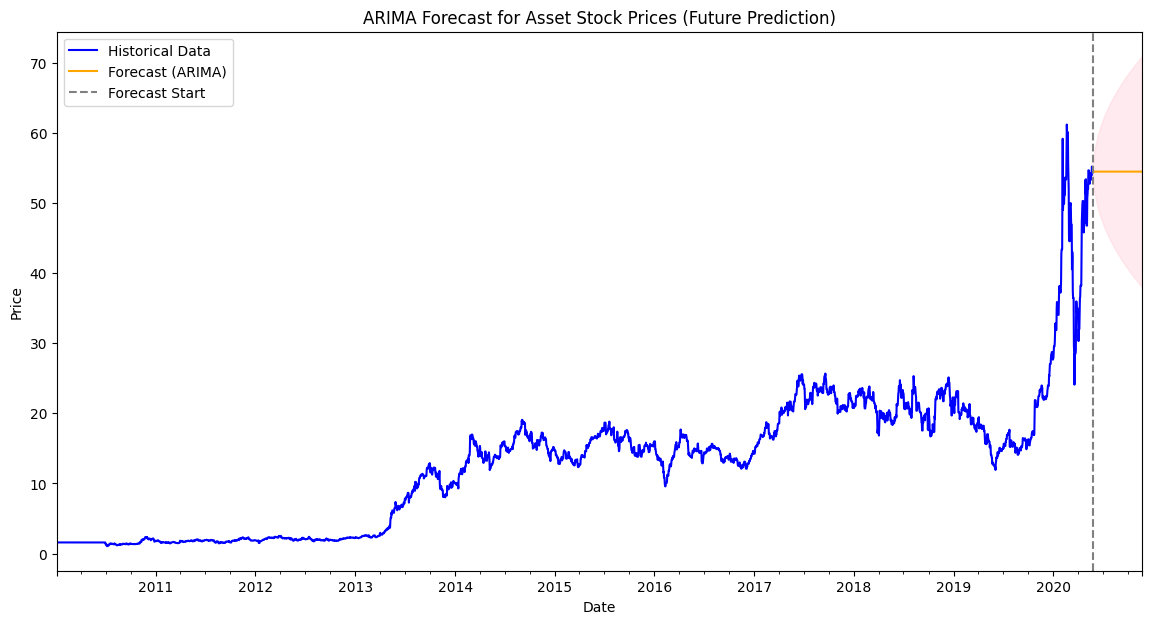

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


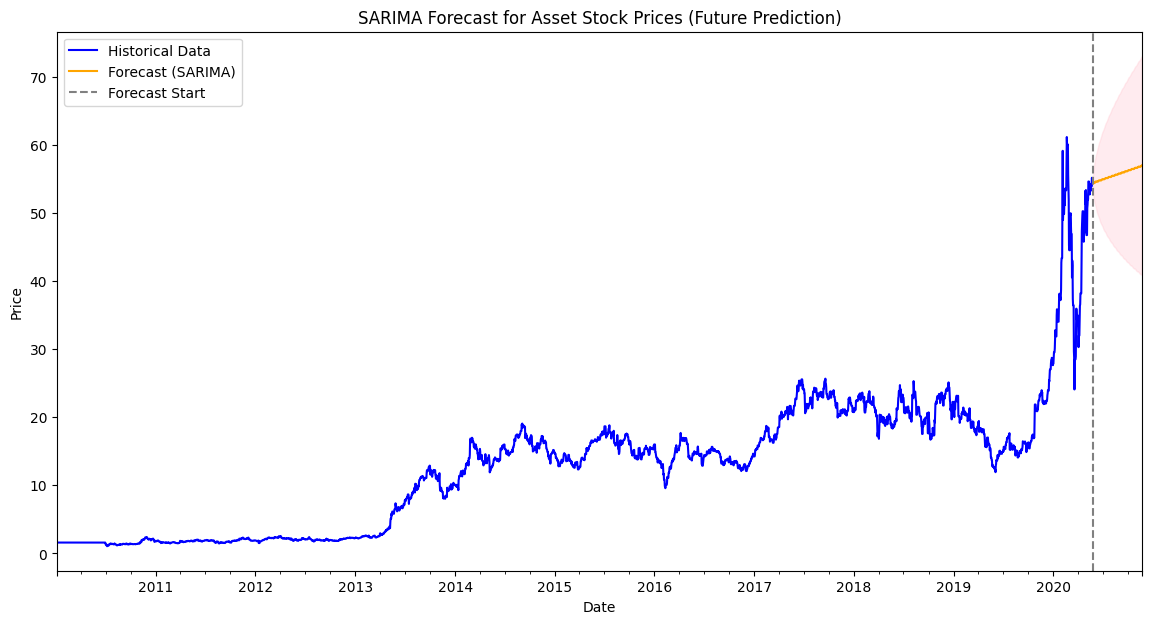

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Semir AI Legend\portfolio-optimization\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0078
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 5.3541e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.0642e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.8287e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.2061e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.8975e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.3673e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.7202e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.8712e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.1761e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

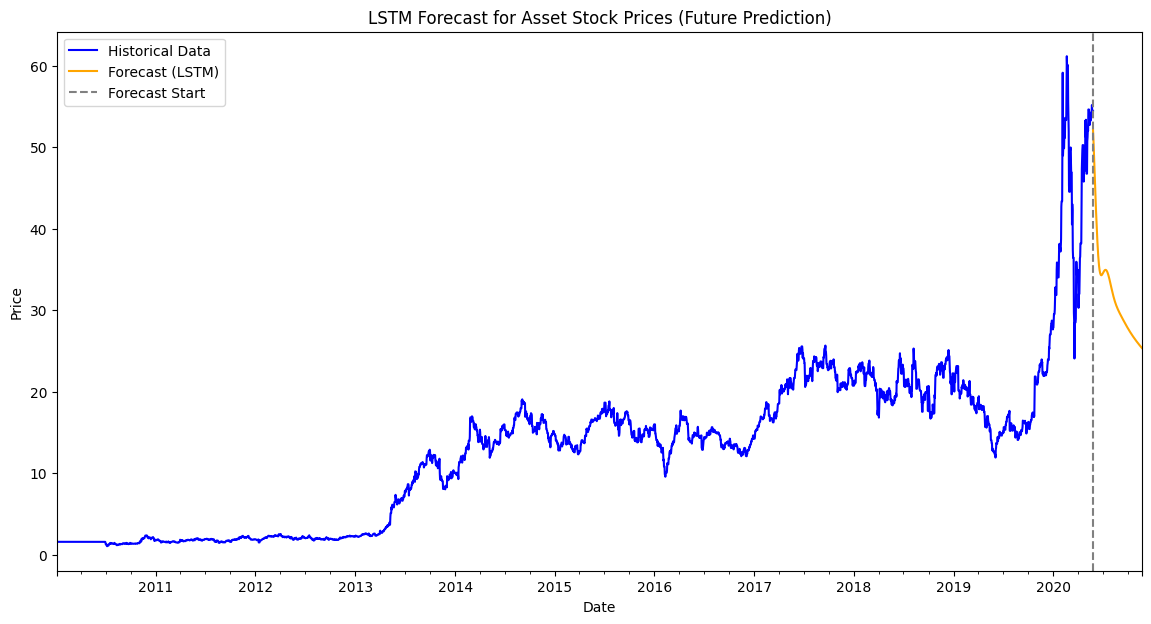

Forecast Summary:
Expected trend over the forecast period: downward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


{'forecast': 2020-05-25    52.133316
 2020-05-26    51.432842
 2020-05-27    50.541706
 2020-05-28    49.581490
 2020-05-29    48.603909
                 ...    
 2020-11-16    25.528042
 2020-11-17    25.488163
 2020-11-18    25.448530
 2020-11-19    25.409153
 2020-11-20    25.370022
 Freq: D, Length: 180, dtype: float32,
 'confidence_intervals': None}

In [27]:

def lstm_model(train_data, test_data, look_back=60, epochs=10, batch_size=32):
    X_train, y_train, scaler = prepare_lstm_data(train_data, look_back)
    X_test, y_test, _ = prepare_lstm_data(test_data, look_back)
    
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    
    return model, scaler  # Only return model and scaler

forecast_and_analyze(train_data, model_type="arima", forecast_period=180)

# Similarly, you can call SARIMA or LSTM forecasts
forecast_and_analyze(train_data, model_type="sarima", forecast_period=180)
forecast_and_analyze(train_data, model_type="lstm", forecast_period=180)

In [28]:
import yfinance as yf
import pandas as pd

# Step 1: Load the data
tickers = ["TSLA", "BND", "SPY"]
#data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close']

# Step 2: Data cleaning and handling missing values
# Filling missing values
data = data.interpolate(method='linear').fillna(method='bfill')

# Step 3: Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=True)  # index=True to include date as the first column

print("Data saved as cleaned_financial_data.csv")

Data saved as cleaned_financial_data.csv


C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_18016\91482498.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear').fillna(method='bfill')
